<a href="https://colab.research.google.com/github/sanskruti-1234/ML/blob/main/Practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Missing Values Before Cleaning:
 Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

Missing Values After Cleaning:
 Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64


<ipython-input-16-360acbec6eb0>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
<ipython-input-16-360acbec6eb0>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({c

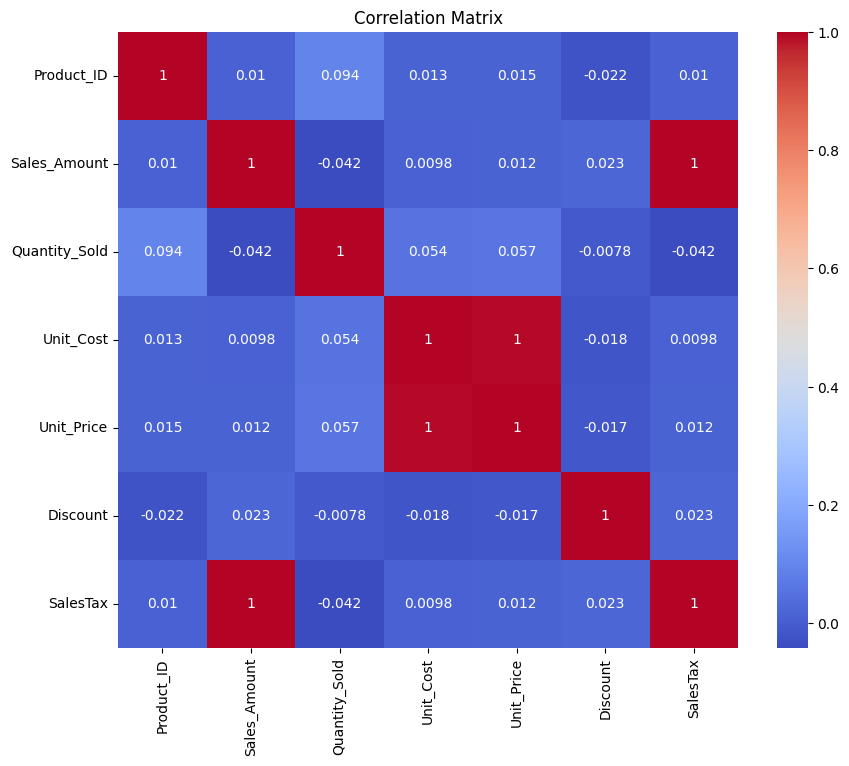

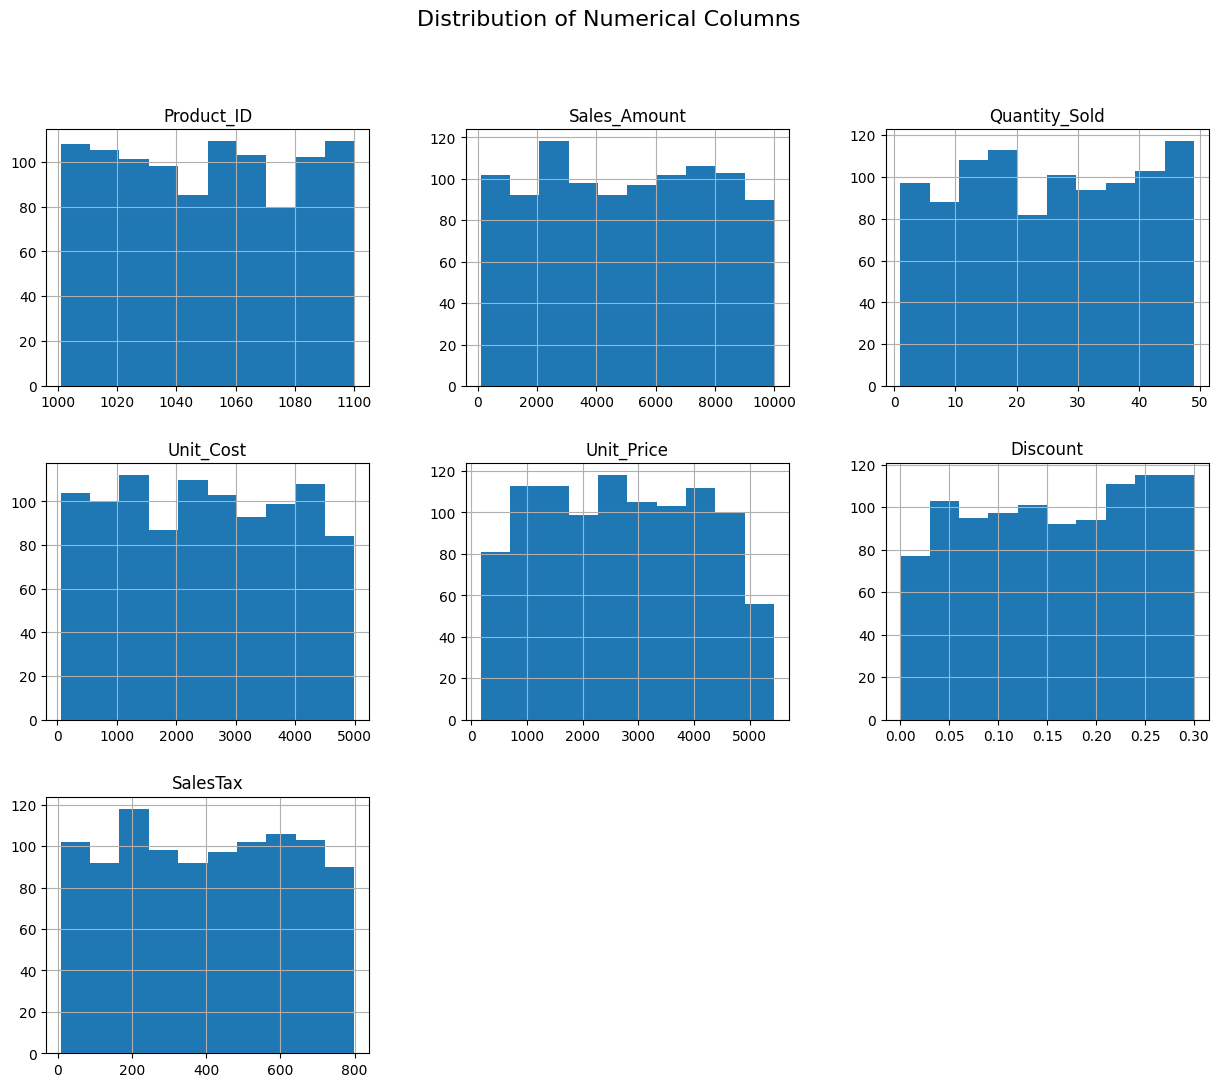

Cleaned and modified data exported to cleaned_sales_data.csv


In [16]:

def process_sales_data(input_file, output_file, sales_tax_rate=0.08):
    """
    Imports sales data, cleans, modifies, and exports it.
    """
    try:
        df = pd.read_csv(input_file)

        # 1. Data Cleaning:

        # Convert 'Date' to datetime (if it exists):
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])

        # Handle missing values:
        print("Missing Values Before Cleaning:\n", df.isnull().sum())

        # Fill NaN in numerical columns with 0:
        for col in df.select_dtypes(include=np.number).columns:
            df[col].fillna(0, inplace=True)

        # Fill NaN in categorical columns with 'Unknown' (if they exist):
        for col in df.select_dtypes(exclude=np.number).columns:
            if col in df.columns:
                df[col].fillna('Unknown', inplace=True)

        print("\nMissing Values After Cleaning:\n", df.isnull().sum())

        # 2. Data Modifications:

        # Add 'SalesTax' column (if 'Sales_Amount' column exists):
        if 'Sales_Amount' in df.columns:
            df['SalesTax'] = df['Sales_Amount'] * sales_tax_rate
        else:
            print("Warning: 'Sales_Amount' column not found, cannot calculate SalesTax.")

        # Convert categorical to numerical (one-hot encoding):
        categorical_cols = df.select_dtypes(exclude=np.number).columns
        for col in categorical_cols:
            if col in df.columns:
                df = pd.get_dummies(df, columns=[col], drop_first=True)

        # Feature Engineering (extract day of week, if date is available):
        if 'Date' in df.columns:
            df['DayOfWeek'] = df['Date'].dt.dayofweek

        # Remove unnecessary columns (example):
        columns_to_remove = [] # add any columns to remove here. example: ['Invoice ID', 'Product ID']
        for col in columns_to_remove:
            if col in df.columns:
                df.drop(col, axis=1, inplace=True)

        # Rename columns (example):
        if 'Total' in df.columns:
            df.rename(columns={'Total': 'TotalSales'}, inplace=True)

        # 3. Visualizations:

        # Correlation Matrix (for numerical columns):
        numerical_cols = df.select_dtypes(include=np.number).columns
        if len(numerical_cols) > 1: # Avoid error when only one numerical column exists
            plt.figure(figsize=(10, 8))
            sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
            plt.title("Correlation Matrix")
            plt.savefig("correlation_matrix.png")
            plt.show()

        # Distribution of Numerical Columns:
        df[numerical_cols].hist(figsize=(15, 12))
        plt.suptitle("Distribution of Numerical Columns", fontsize=16)
        plt.savefig("numerical_distribution.png")
        plt.show()


        # 4. Export to CSV:
        df.to_csv(output_file, index=False)
        print(f"Cleaned and modified data exported to {output_file}")

    except FileNotFoundError:
        print(f"Error: Input file '{input_file}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
input_csv = 'sales_data.csv' # Replace with your file path
output_csv = 'cleaned_sales_data.csv'

process_sales_data(input_csv, output_csv)